In [1]:
import pandas as pd
import pathlib as path



import requests
import json
from pprint import pprint

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import geopandas as gpd

# import files

In [2]:
### import and read csv file

path = 'Output/immigrants_by_country_year.csv'
imm_df = pd.read_csv(path)
imm_df = imm_df.rename(columns={'total':'Immigration_flow'})

imm_df.head(5)

,country,year,immigration_flow
0,Afghanistan,2015,2625
1,Afghanistan,2016,2655
2,Afghanistan,2017,3460
3,Afghanistan,2018,3560
4,Afghanistan,2019,3890


In [3]:
### import and read csv file

path = 'Output/immigrants_by_country.csv'
imm_cumul_df = pd.read_csv(path)
# imm_cumul_df = imm_cumul_df.rename(columns={'total':'Immigration_flow'})

imm_cumul_df.head(5)

,country,immigration_flow
0,Afghanistan,81305
1,Albania,5540
2,Algeria,39655
3,American Samoa,0
4,Andorra,0


In [4]:
### import and read csv file

path = 'Output/countries_list_UN_referential.csv'
countries_df = pd.read_csv(path)


countries_df.head(5)

,iso3Code,iso2Code,country,region,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.52280
2,AGO,AO,Angola,Sub-Saharan Africa,Luanda,13.2420,-8.81155
3,ALB,AL,Albania,Europe & Central Asia,Tirane,19.8172,41.33170
4,AND,AD,Andorra,Europe & Central Asia,Andorra la Vella,1.5218,42.50750


In [5]:
### import and read csv file

path = 'Output/macro_economic_data.csv'
macro_data_df = pd.read_csv(path)

# #drop Nan values
# macro_data_df = macro_data_df['value'].dropna(how="all")

macro_data_df.head(5)

,iso3Code,iso2Code,country,year,indicator,value
0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533


# immigration flow per year

In [6]:
immigration_year = imm_df.groupby(['year'])['immigration_flow'].sum()
immigration_year

year
2015    271155
2016    295675
2017    285795
2018    320300
2019    340460
2020    183600
2021    405185
2022    436820
2023    471040
2024    413910
Name: immigration_flow, dtype: int64

<Axes: title={'center': 'Flow immigration per year'}, xlabel='year', ylabel='Flow immigration'>

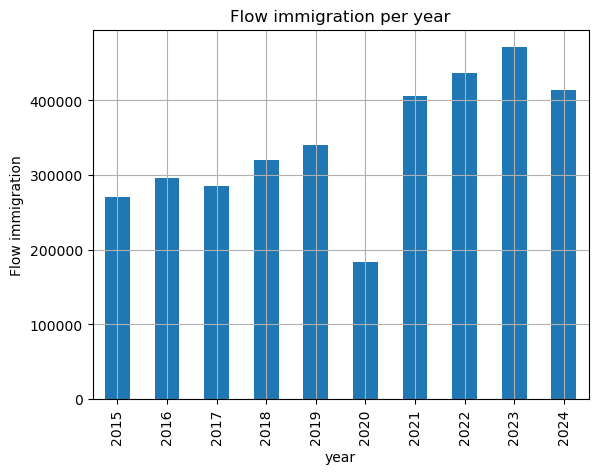

In [7]:
ax = immigration_year.plot(kind='bar')
ax.set_title('Flow immigration per year')
ax.set_ylabel('Flow immigration')
ax.grid()
ax

# immigration by country

In [8]:
countries_selection = imm_cumul_df.sort_values('immigration_flow', ascending=False).head(20)
countries_selection['Immigration_flow (000`)'] = countries_selection['immigration_flow'] / 1000
countries_selection = countries_selection.reset_index()
countries_selection = countries_selection.drop(columns = {'index', 'immigration_flow'})
countries_selection = countries_selection.set_index('country').sort_values('Immigration_flow (000`)')
countries_selection

,Immigration_flow (000`)
country,
Jamaica,36.375
Morocco,38.215
Algeria,39.655
Mexico,40.410
Viet Nam,41.200
"Korea, Rep.",49.105
Brazil,50.365
United Kingdom,50.770
Cameroon,50.885


<Axes: title={'center': 'Immigration by country from 2015-2024'}, ylabel='country'>

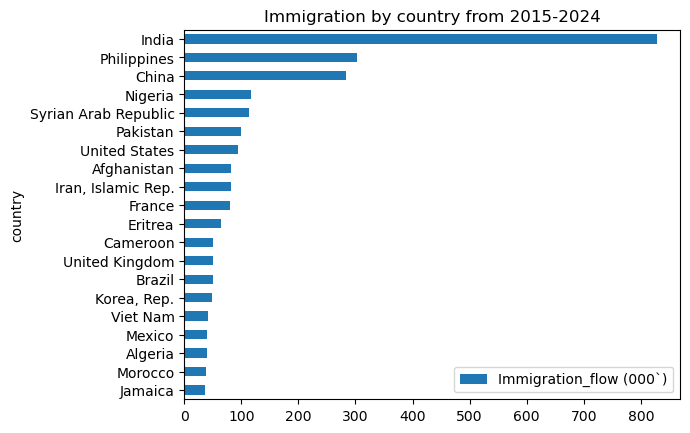

In [9]:
ax = countries_selection.plot(kind = "barh")
ax.set_title("Immigration by country from 2015-2024")
ax

# macro_data average

In [10]:
print(f'size before{macro_data_df.shape}')
macro_data_df_clean = macro_data_df.replace('', np.nan)
macro_data_df_clean = macro_data_df.dropna(how="any")
print(f'size after{macro_data_df_clean.shape}')

size before(38556, 6)
size after(25965, 6)


In [11]:
macro_data_df_clean

,iso3Code,iso2Code,country,year,indicator,value
0,AFG,AF,Afghanistan,2023,GDP per capita (constant 2015 US$),379.707497
1,AFG,AF,Afghanistan,2022,GDP per capita (constant 2015 US$),377.665627
2,AFG,AF,Afghanistan,2021,GDP per capita (constant 2015 US$),408.625855
3,AFG,AF,Afghanistan,2020,GDP per capita (constant 2015 US$),527.834554
4,AFG,AF,Afghanistan,2019,GDP per capita (constant 2015 US$),557.861533
...,...,...,...,...,...,...
38500,TCA,TC,Turks and Caicos Islands,2016,Arable land (hectares per person),0.026099
38501,TCA,TC,Turks and Caicos Islands,2015,Arable land (hectares per person),0.027319
38513,TCA,TC,Turks and Caicos Islands,2021,Children out of school (% of primary school age),4.869590
38517,TCA,TC,Turks and Caicos Islands,2017,Children out of school (% of primary school age),6.329784


In [12]:
macro_data_avg_df = macro_data_df_clean.groupby(['country', 'indicator'])['value'].mean() 
macro_data_avg_df

country      indicator                                                                            
Afghanistan  Access to clean fuels and technologies for cooking (% of population)                     3.193750e+01
             Access to electricity (% of population)                                                  9.233750e+01
             Adjusted net national income (constant 2015 US$)                                         1.857257e+10
             Arable land (hectares per person)                                                        2.117053e-01
             Automated teller machines (ATMs) (per 100,000 adults)                                    1.288000e+00
                                                                                                          ...     
Zimbabwe     Population, total                                                                        1.531684e+07
             Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                

In [13]:
macro_data_avg_df= macro_data_avg_df.reset_index()
macro_data_avg_df

,country,indicator,value
0,Afghanistan,Access to clean fuels and technologies for coo...,3.193750e+01
1,Afghanistan,Access to electricity (% of population),9.233750e+01
2,Afghanistan,Adjusted net national income (constant 2015 US$),1.857257e+10
3,Afghanistan,Arable land (hectares per person),2.117053e-01
4,Afghanistan,"Automated teller machines (ATMs) (per 100,000 ...",1.288000e+00
...,...,...,...
3555,Zimbabwe,"Population, total",1.531684e+07
3556,Zimbabwe,Poverty headcount ratio at $2.15 a day (2017 P...,3.700000e+01
3557,Zimbabwe,Rural population (% of total population),6.768956e+01
3558,Zimbabwe,Unemployment with advanced education (% of tot...,6.156250e+00


In [14]:
macro_data_avg_pivot = macro_data_avg_df.pivot(index='country', columns='indicator', values='value')
macro_data_avg_pivot

indicator,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adequacy of social insurance programs (% of total welfare of beneficiary households),Adjusted net national income (constant 2015 US$),Arable land (hectares per person),"Automated teller machines (ATMs) (per 100,000 adults)",Children out of school (% of primary school age),Consumer price index (2010 = 100),Control of Corruption: Estimate,"Current health expenditure per capita, PPP (current international $)",...,GDP per capita (constant 2015 US$),Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Market capitalization of listed domestic companies (% of GDP),Population density (people per sq. km of land area),"Population, total",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Rural population (% of total population),S&P Global Equity Indices (annual % change),Unemployment with advanced education (% of total labor force with advanced education),"Unemployment, total (% of total labor force) (national estimate)"
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,31.9375,92.3375,NaN,1.857257e+10,0.211705,1.288000,NaN,142.724215,-1.370160,289.550720,...,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333
Albania,81.0625,99.9750,300.556065,1.013583e+10,0.213405,32.622857,3.852286,121.101852,-0.500036,922.561030,...,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.10,38.859000,NaN,15.266800,13.999400
Algeria,99.6750,99.6125,NaN,1.379255e+11,0.176649,9.075714,0.372762,156.133146,-0.639697,746.584852,...,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000
American Samoa,NaN,NaN,NaN,NaN,0.018461,NaN,NaN,NaN,1.411231,NaN,...,12799.629941,NaN,NaN,253.221250,5.029722e+04,NaN,12.815667,NaN,NaN,NaN
Andorra,100.0000,100.0000,NaN,NaN,0.010642,NaN,6.919064,NaN,1.211647,4097.228420,...,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,90.8375,99.7125,NaN,2.434293e+11,0.071881,25.234286,0.346843,163.357704,-0.446718,464.348123,...,3164.032600,18.130315,44.544592,307.940756,9.693984e+07,1.05,63.364778,6.898272,3.482444,1.785444
West Bank and Gaza,NaN,99.9750,20.813136,NaN,0.011517,23.874286,6.364552,113.583340,-0.447265,NaN,...,3216.806490,44.344601,23.373359,760.994559,4.697976e+06,0.50,23.545667,NaN,30.800875,25.115250
"Yemen, Rep.",53.1250,71.8875,NaN,3.896534e+10,0.033747,6.390000,24.384279,NaN,-1.655679,102.291282,...,1049.189756,169.761905,NaN,65.594132,3.516052e+07,NaN,62.713889,NaN,NaN,NaN


In [15]:
macro_data_avg_pivot.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adjusted net national income (constant 2015 US$)',
       'Arable land (hectares per person)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Children out of school (% of primary school age)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Current health expenditure per capita, PPP (current international $)',
       'Domestic general government health expenditure per capita, PPP (current international $)',
       'GDP per capita (constant 2015 US$)',
       'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
       'Market capitalization of listed domestic companies (% of GDP)',
       'Population density (people per sq. km of land area)',
       'P

In [16]:
macro_data_avg_pivot = macro_data_avg_pivot.rename(columns={
                                                'GDP per capita (constant 2015 US$)' : 'GDP_percapita' , 
                                                'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)' : 'Poverty headcount' ,                                                 
                                                'Unemployment with advanced education (% of total labor force with advanced education)' : 'Unemployment_educated' , 
                                                'Unemployment, total (% of total labor force) (national estimate)' : 'Unemployment_total' , 
                                                 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources' : 'Level of water stress' , 
                                                 'Market capitalization of listed domestic companies (% of GDP)' : 'Market capitalization' , 
                                                 'Population density (people per sq. km of land area)' : 'Population density' , 
                                                 'Rural population (% of total population)' : 'Rural population' ,      
                                                 'S&P Global Equity Indices (annual % change)' : 'S&P Global Equity Indices' ,    
                                                 'Voice and Accountability: Number of Sources' : 'Voice and Accountability' ,       
                                                 'Access to electricity (% of population)'  :  'Access to electricity '  ,
                                                'Access to clean fuels and technologies for cooking (% of population)'  :  'Access to clean fuels and technologies for cooking '  ,
                                                'Access to electricity (% of population)'  :  'Access to electricity '  ,
                                                'Adequacy of social insurance programs (% of total welfare of beneficiary households)'  :  'Adequacy of social insurance programs '  ,
                                                'Adjusted net national income (constant 2015 US$)'  :  'Adjusted net national income '  ,
                                                'Arable land (hectares per person)'  :  'Arable land '  ,
                                                'Automated teller machines (ATMs) (per 100,000 adults)'  :  'Automated teller machines '  ,
                                                'Children out of school (% of primary school age)'  :  'Children out of school '  ,
                                                'Consumer price index (2010 = 100)'  :  'Consumer price index '  ,
                                                'Control of Corruption: Estimate'  :  'Control of Corruption: Estimate'  ,
                                                'Current health expenditure per capita, PPP (current international $)'  :  'Current health expenditure per capita, PPP '  ,
                                                'Domestic general government health expenditure per capita, PPP (current international $)'  :  'Domestic general government health expenditure per capita, PPP '  ,
                            
                                                    })
macro_data_avg_pivot

indicator,Access to clean fuels and technologies for cooking,Access to electricity,Adequacy of social insurance programs,Adjusted net national income,Arable land,Automated teller machines,Children out of school,Consumer price index,Control of Corruption: Estimate,"Current health expenditure per capita, PPP",...,GDP_percapita,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,31.9375,92.3375,NaN,1.857257e+10,0.211705,1.288000,NaN,142.724215,-1.370160,289.550720,...,499.670207,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333
Albania,81.0625,99.9750,300.556065,1.013583e+10,0.213405,32.622857,3.852286,121.101852,-0.500036,922.561030,...,4568.486552,5.815591,NaN,103.914380,2.836000e+06,0.10,38.859000,NaN,15.266800,13.999400
Algeria,99.6750,99.6125,NaN,1.379255e+11,0.176649,9.075714,0.372762,156.133146,-0.639697,746.584852,...,4623.518157,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000
American Samoa,NaN,NaN,NaN,NaN,0.018461,NaN,NaN,NaN,1.411231,NaN,...,12799.629941,NaN,NaN,253.221250,5.029722e+04,NaN,12.815667,NaN,NaN,NaN
Andorra,100.0000,100.0000,NaN,NaN,0.010642,NaN,6.919064,NaN,1.211647,4097.228420,...,38684.748525,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,90.8375,99.7125,NaN,2.434293e+11,0.071881,25.234286,0.346843,163.357704,-0.446718,464.348123,...,3164.032600,18.130315,44.544592,307.940756,9.693984e+07,1.05,63.364778,6.898272,3.482444,1.785444
West Bank and Gaza,NaN,99.9750,20.813136,NaN,0.011517,23.874286,6.364552,113.583340,-0.447265,NaN,...,3216.806490,44.344601,23.373359,760.994559,4.697976e+06,0.50,23.545667,NaN,30.800875,25.115250
"Yemen, Rep.",53.1250,71.8875,NaN,3.896534e+10,0.033747,6.390000,24.384279,NaN,-1.655679,102.291282,...,1049.189756,169.761905,NaN,65.594132,3.516052e+07,NaN,62.713889,NaN,NaN,NaN


In [17]:
macro_data_avg_pivot.columns

Index(['Access to clean fuels and technologies for cooking ',
       'Access to electricity ', 'Adequacy of social insurance programs ',
       'Adjusted net national income ', 'Arable land ',
       'Automated teller machines ', 'Children out of school ',
       'Consumer price index ', 'Control of Corruption: Estimate',
       'Current health expenditure per capita, PPP ',
       'Domestic general government health expenditure per capita, PPP ',
       'GDP_percapita', 'Level of water stress', 'Market capitalization',
       'Population density', 'Population, total', 'Poverty headcount',
       'Rural population', 'S&P Global Equity Indices',
       'Unemployment_educated', 'Unemployment_total'],
      dtype='object', name='indicator')

In [18]:
imm_vs_macrodata_df = pd.merge(macro_data_avg_pivot,imm_cumul_df, on='country')

imm_vs_macrodata_df

,country,Access to clean fuels and technologies for cooking,Access to electricity,Adequacy of social insurance programs,Adjusted net national income,Arable land,Automated teller machines,Children out of school,Consumer price index,Control of Corruption: Estimate,...,Level of water stress,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,immigration_flow
0,Afghanistan,31.9375,92.3375,NaN,1.857257e+10,0.211705,1.288000,NaN,142.724215,-1.370160,...,54.757019,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,81305
1,Albania,81.0625,99.9750,300.556065,1.013583e+10,0.213405,32.622857,3.852286,121.101852,-0.500036,...,5.815591,NaN,103.914380,2.836000e+06,0.10,38.859000,NaN,15.266800,13.999400,5540
2,Algeria,99.6750,99.6125,NaN,1.379255e+11,0.176649,9.075714,0.372762,156.133146,-0.639697,...,135.066031,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,39655
3,American Samoa,NaN,NaN,NaN,NaN,0.018461,NaN,NaN,NaN,1.411231,...,NaN,NaN,253.221250,5.029722e+04,NaN,12.815667,NaN,NaN,NaN,0
4,Andorra,100.0000,100.0000,NaN,NaN,0.010642,NaN,6.919064,NaN,1.211647,...,NaN,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Viet Nam,90.8375,99.7125,NaN,2.434293e+11,0.071881,25.234286,0.346843,163.357704,-0.446718,...,18.130315,44.544592,307.940756,9.693984e+07,1.05,63.364778,6.898272,3.482444,1.785444,41200
198,West Bank and Gaza,NaN,99.9750,20.813136,NaN,0.011517,23.874286,6.364552,113.583340,-0.447265,...,44.344601,23.373359,760.994559,4.697976e+06,0.50,23.545667,NaN,30.800875,25.115250,5920
199,"Yemen, Rep.",53.1250,71.8875,NaN,3.896534e+10,0.033747,6.390000,24.384279,NaN,-1.655679,...,169.761905,NaN,65.594132,3.516052e+07,NaN,62.713889,NaN,NaN,NaN,5875
200,Zambia,11.4875,41.1375,3.399230,1.706274e+10,0.210305,10.691429,14.445050,238.766830,-0.576324,...,2.835498,15.693374,24.559481,1.853135e+07,62.55,55.907667,4.750816,7.059286,6.317000,605


In [19]:
imm_vs_macrodata_df['immigration_100k'] = imm_vs_macrodata_df['immigration_flow'] / imm_vs_macrodata_df['Population, total'] * 100000
imm_vs_macrodata_df

,country,Access to clean fuels and technologies for cooking,Access to electricity,Adequacy of social insurance programs,Adjusted net national income,Arable land,Automated teller machines,Children out of school,Consumer price index,Control of Corruption: Estimate,...,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,immigration_flow,immigration_100k
0,Afghanistan,31.9375,92.3375,NaN,1.857257e+10,0.211705,1.288000,NaN,142.724215,-1.370160,...,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,81305,215.267575
1,Albania,81.0625,99.9750,300.556065,1.013583e+10,0.213405,32.622857,3.852286,121.101852,-0.500036,...,NaN,103.914380,2.836000e+06,0.10,38.859000,NaN,15.266800,13.999400,5540,195.345527
2,Algeria,99.6750,99.6125,NaN,1.379255e+11,0.176649,9.075714,0.372762,156.133146,-0.639697,...,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,39655,91.793054
3,American Samoa,NaN,NaN,NaN,NaN,0.018461,NaN,NaN,NaN,1.411231,...,NaN,253.221250,5.029722e+04,NaN,12.815667,NaN,NaN,NaN,0,0.000000
4,Andorra,100.0000,100.0000,NaN,NaN,0.010642,NaN,6.919064,NaN,1.211647,...,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Viet Nam,90.8375,99.7125,NaN,2.434293e+11,0.071881,25.234286,0.346843,163.357704,-0.446718,...,44.544592,307.940756,9.693984e+07,1.05,63.364778,6.898272,3.482444,1.785444,41200,42.500585
198,West Bank and Gaza,NaN,99.9750,20.813136,NaN,0.011517,23.874286,6.364552,113.583340,-0.447265,...,23.373359,760.994559,4.697976e+06,0.50,23.545667,NaN,30.800875,25.115250,5920,126.011715
199,"Yemen, Rep.",53.1250,71.8875,NaN,3.896534e+10,0.033747,6.390000,24.384279,NaN,-1.655679,...,NaN,65.594132,3.516052e+07,NaN,62.713889,NaN,NaN,NaN,5875,16.709082
200,Zambia,11.4875,41.1375,3.399230,1.706274e+10,0.210305,10.691429,14.445050,238.766830,-0.576324,...,15.693374,24.559481,1.853135e+07,62.55,55.907667,4.750816,7.059286,6.317000,605,3.264738


In [20]:
imm_vs_macrodata_df.columns

Index(['country', 'Access to clean fuels and technologies for cooking ',
       'Access to electricity ', 'Adequacy of social insurance programs ',
       'Adjusted net national income ', 'Arable land ',
       'Automated teller machines ', 'Children out of school ',
       'Consumer price index ', 'Control of Corruption: Estimate',
       'Current health expenditure per capita, PPP ',
       'Domestic general government health expenditure per capita, PPP ',
       'GDP_percapita', 'Level of water stress', 'Market capitalization',
       'Population density', 'Population, total', 'Poverty headcount',
       'Rural population', 'S&P Global Equity Indices',
       'Unemployment_educated', 'Unemployment_total', 'immigration_flow',
       'immigration_100k'],
      dtype='object')

In [21]:
imm_vs_macrodata_df = imm_vs_macrodata_df[['country', 'Access to clean fuels and technologies for cooking ',
       'Access to electricity ', 'Adequacy of social insurance programs ',
       'Adjusted net national income ', 'Arable land ',
       'Automated teller machines ', 'Children out of school ',
       'Consumer price index ', 'Control of Corruption: Estimate',
       'Current health expenditure per capita, PPP ',
       'Domestic general government health expenditure per capita, PPP ',
       'GDP_percapita', 'Level of water stress', 'Market capitalization',
       'Population density', 'Population, total', 'Poverty headcount',
       'Rural population', 'S&P Global Equity Indices',
       'Unemployment_educated', 'Unemployment_total', 'immigration_flow',
       'immigration_100k']]
imm_vs_macrodata_df

,country,Access to clean fuels and technologies for cooking,Access to electricity,Adequacy of social insurance programs,Adjusted net national income,Arable land,Automated teller machines,Children out of school,Consumer price index,Control of Corruption: Estimate,...,Market capitalization,Population density,"Population, total",Poverty headcount,Rural population,S&P Global Equity Indices,Unemployment_educated,Unemployment_total,immigration_flow,immigration_100k
0,Afghanistan,31.9375,92.3375,NaN,1.857257e+10,0.211705,1.288000,NaN,142.724215,-1.370160,...,NaN,57.201582,3.776927e+07,NaN,74.198778,NaN,13.208333,9.524333,81305,215.267575
1,Albania,81.0625,99.9750,300.556065,1.013583e+10,0.213405,32.622857,3.852286,121.101852,-0.500036,...,NaN,103.914380,2.836000e+06,0.10,38.859000,NaN,15.266800,13.999400,5540,195.345527
2,Algeria,99.6750,99.6125,NaN,1.379255e+11,0.176649,9.075714,0.372762,156.133146,-0.639697,...,0.170707,17.982629,4.320044e+07,NaN,26.865444,NaN,17.750000,11.136000,39655,91.793054
3,American Samoa,NaN,NaN,NaN,NaN,0.018461,NaN,NaN,NaN,1.411231,...,NaN,253.221250,5.029722e+04,NaN,12.815667,NaN,NaN,NaN,0,0.000000
4,Andorra,100.0000,100.0000,NaN,NaN,0.010642,NaN,6.919064,NaN,1.211647,...,NaN,160.958245,7.622878e+04,NaN,11.983556,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Viet Nam,90.8375,99.7125,NaN,2.434293e+11,0.071881,25.234286,0.346843,163.357704,-0.446718,...,44.544592,307.940756,9.693984e+07,1.05,63.364778,6.898272,3.482444,1.785444,41200,42.500585
198,West Bank and Gaza,NaN,99.9750,20.813136,NaN,0.011517,23.874286,6.364552,113.583340,-0.447265,...,23.373359,760.994559,4.697976e+06,0.50,23.545667,NaN,30.800875,25.115250,5920,126.011715
199,"Yemen, Rep.",53.1250,71.8875,NaN,3.896534e+10,0.033747,6.390000,24.384279,NaN,-1.655679,...,NaN,65.594132,3.516052e+07,NaN,62.713889,NaN,NaN,NaN,5875,16.709082
200,Zambia,11.4875,41.1375,3.399230,1.706274e+10,0.210305,10.691429,14.445050,238.766830,-0.576324,...,15.693374,24.559481,1.853135e+07,62.55,55.907667,4.750816,7.059286,6.317000,605,3.264738


In [22]:
def regression_plot(dataframe, col1, col2):
    
    df_regression = dataframe[[col1,col2]]
    df_regression = df_regression.dropna(how= 'any')


    x_axis = df_regression[col1]
    y_axis = df_regression[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

In [23]:
# function to generate a plot + regression line between two columns to be defined as arguments. the data is free from outliers

def regression_plot_outliersfree(dataframe, col1, col2):
    
    # creae a Df with the 2 selected columns
    df_regression = dataframe[[col1,col2]]

    # drop empty rows from new DF
    df_regression = df_regression.dropna(how= 'any')


    # identify outliers
    var = df_regression[col2]
    q1 = np.quantile(var, 0.25) 
    q3 = np.quantile(var, 0.75)   
    iqr = q3 - q1
    outliers = var[(var > (q3 + (iqr * 1.5))) | (var < (q1 - (iqr * 1.5)))].tolist()

    # drop  outliers from new DF
    x = ~df_regression[col2].isin(outliers)
    dataframe_filtered = df_regression[x]


    # define axis of the scaterplot

    x_axis = dataframe_filtered[col1]
    y_axis = dataframe_filtered[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    # plt.savefig(f'Output/Q4_regression_{col1}_vs_{col2}.png')
    plt.show()

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Market capitalization')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Population density')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'S&P Global Equity Indices')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Voice and Accountability')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Level of water stress')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'GDP_percapita')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Poverty headcount')


In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Unemployment_total')

In [ ]:
# correlation

regression_plot_outliersfree(imm_vs_macrodata_df,'immigration_100k', 'Unemployment_educated')

In [24]:
indicators_list = imm_vs_macrodata_df.columns.to_list()
indicators_list = indicators_list[1:len(indicators_list)-3]
indicators_list

['Access to clean fuels and technologies for cooking ',
 'Access to electricity ',
 'Adequacy of social insurance programs ',
 'Adjusted net national income ',
 'Arable land ',
 'Automated teller machines ',
 'Children out of school ',
 'Consumer price index ',
 'Control of Corruption: Estimate',
 'Current health expenditure per capita, PPP ',
 'Domestic general government health expenditure per capita, PPP ',
 'GDP_percapita',
 'Level of water stress',
 'Market capitalization',
 'Population density',
 'Population, total',
 'Poverty headcount',
 'Rural population',
 'S&P Global Equity Indices',
 'Unemployment_educated']

In [25]:
# function that compares all the indicators against ONE (immigration flow or immigration_100K) and generate a DF with al the regression parameters

def select_indicator(dataframe):
    
    # create list of indicator from the Dataframe consolidated
    indicators_list = dataframe.columns.to_list()
    indicators_list = indicators_list[1:len(indicators_list)-3]
    indicators_list

    # create list of returned values
    indic_selection = []

    # loop through the indicators
    for ind in indicators_list :
        col1 = 'immigration_flow'
        col2 = ind


        df_regression = dataframe[[col1,col2]]
        
        #drop empty values

        df_regression = df_regression.dropna(how= 'any')


        # identify outliers
        var = df_regression[col2]
        q1 = np.quantile(var, 0.25) 
        q3 = np.quantile(var, 0.75)   
        iqr = q3 - q1
        outliers = var[(var > (q3 + (iqr * 1.5))) | (var < (q1 - (iqr * 1.5)))].tolist()

        # Exclude  outliers
        x = ~df_regression[col2].isin(outliers)
        dataframe_filtered = df_regression[x]

        x_axis = dataframe_filtered[col1]
        y_axis = dataframe_filtered[col2]

        ## calculate slope and intercept of the regression equation

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        

        # append regresson values in list of dictionaries
        indic_selection.append({
                            'indicator A' : col1,
                            'indicator B' : col2,
                            'slope' : slope,
                            'intercept' :  intercept, 
                            'rvalue' : rvalue, 
                            'pvalue' : pvalue, 
                            'std' : stderr,
                            "rvalue_abs" : abs(rvalue)

                            })
    
    # create DF from list of indicators compared
    selection_df = pd.DataFrame(indic_selection)
    selection_df = selection_df.sort_values('rvalue_abs', ascending=False)

    selection_df = selection_df.reset_index()    
    
    return selection_df.head(20)


In [28]:
# run the function and compare all indicators
synthesis_df = select_indicator(imm_vs_macrodata_df)
synthesis_df

,index,indicator A,indicator B,slope,intercept,rvalue,pvalue,std,rvalue_abs
0,15,immigration_flow,"Population, total",4.738897e+02,9.194611e+06,0.465175,3.689406e-11,6.721646e+01,0.465175
1,3,immigration_flow,Adjusted net national income,1.337415e+06,5.555823e+10,0.411710,1.504957e-07,2.425216e+05,0.411710
2,14,immigration_flow,Population density,4.445484e-04,1.058283e+02,0.290309,7.024601e-05,1.092206e-04,0.290309
3,12,immigration_flow,Level of water stress,7.481442e-05,1.570191e+01,0.284482,3.338337e-04,2.038256e-05,0.284482
4,13,immigration_flow,Market capitalization,7.347467e-05,4.357191e+01,0.205762,6.708905e-02,3.956674e-05,0.205762
5,19,immigration_flow,Unemployment_educated,1.250323e-05,6.727273e+00,0.183075,1.787843e-02,5.226963e-06,0.183075
6,18,immigration_flow,S&P Global Equity Indices,5.615001e-06,1.343166e+00,0.125727,2.824574e-01,5.185593e-06,0.125727
7,7,immigration_flow,Consumer price index,4.479047e-05,1.347760e+02,0.116419,1.426380e-01,3.039980e-05,0.116419
8,10,immigration_flow,Domestic general government health expenditure...,-1.184391e-03,6.763638e+02,-0.110683,1.569820e-01,8.329960e-04,0.110683
9,9,immigration_flow,"Current health expenditure per capita, PPP",-1.626920e-03,1.175602e+03,-0.094851,2.199443e-01,1.321310e-03,0.094851


In [30]:
synthesis_df.to_excel('Output/regression.xlsx')

# create the bar race
#### source : https://github.com/dexplo/bar_chart_race

#### Library bar_chart_race : bar_chart_race (pip install bar_chart_race)
#### documentation : https://www.dexplo.org/bar_chart_race/tutorial/

In [32]:
### import and read csv file

path = 'Output/immigrants_by_country_monthly.csv'
imm_race = pd.read_csv(path)


imm_race.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow
0,0,Afghanistan,2015,Feb,2,Q1,125
1,1,Albania,2015,Feb,2,Q1,25
2,2,Algeria,2015,Feb,2,Q1,125
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5
4,4,Argentina,2015,Feb,2,Q1,15


### prepare data for race bar chart

In [33]:
imm_race['month'] = imm_race['month_int']
imm_race['date'] = pd.to_datetime(imm_race[['year','month']].assign(day=1))

imm_race.head(5)

,index,country,year,month_str,month_int,quarter,immigration_flow,month,date
0,0,Afghanistan,2015,Feb,2,Q1,125,2,2015-02-01
1,1,Albania,2015,Feb,2,Q1,25,2,2015-02-01
2,2,Algeria,2015,Feb,2,Q1,125,2,2015-02-01
3,3,Antigua and Barbuda,2015,Feb,2,Q1,5,2,2015-02-01
4,4,Argentina,2015,Feb,2,Q1,15,2,2015-02-01


In [34]:
imm_race = imm_race.pivot_table(columns='country', index='date', values = 'immigration_flow',aggfunc='sum')

imm_race.head(5)

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,90.0,15.0,80.0,NaN,NaN,0.0,0.0,10.0,10.0,95.0,...,455.0,0.0,5.0,NaN,40.0,90.0,25.0,15.0,0.0,15.0
2015-02-01,125.0,25.0,125.0,0.0,NaN,NaN,5.0,15.0,10.0,70.0,...,450.0,0.0,5.0,NaN,40.0,165.0,20.0,5.0,NaN,15.0
2015-03-01,220.0,50.0,235.0,NaN,NaN,0.0,10.0,15.0,10.0,100.0,...,470.0,0.0,25.0,NaN,75.0,180.0,20.0,25.0,0.0,25.0
2015-04-01,135.0,45.0,255.0,NaN,0.0,10.0,0.0,25.0,20.0,145.0,...,565.0,0.0,15.0,NaN,80.0,155.0,20.0,20.0,0.0,15.0
2015-05-01,220.0,45.0,340.0,NaN,NaN,0.0,0.0,25.0,15.0,160.0,...,740.0,10.0,10.0,NaN,70.0,150.0,25.0,15.0,0.0,20.0


In [36]:
imm_race = imm_race.fillna(0)
imm_race.head(10)

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,90.0,15.0,80.0,0.0,0.0,0.0,0.0,10.0,10.0,95.0,...,455.0,0.0,5.0,0.0,40.0,90.0,25.0,15.0,0.0,15.0
2015-02-01,125.0,25.0,125.0,0.0,0.0,0.0,5.0,15.0,10.0,70.0,...,450.0,0.0,5.0,0.0,40.0,165.0,20.0,5.0,0.0,15.0
2015-03-01,220.0,50.0,235.0,0.0,0.0,0.0,10.0,15.0,10.0,100.0,...,470.0,0.0,25.0,0.0,75.0,180.0,20.0,25.0,0.0,25.0
2015-04-01,135.0,45.0,255.0,0.0,0.0,10.0,0.0,25.0,20.0,145.0,...,565.0,0.0,15.0,0.0,80.0,155.0,20.0,20.0,0.0,15.0
2015-05-01,220.0,45.0,340.0,0.0,0.0,0.0,0.0,25.0,15.0,160.0,...,740.0,10.0,10.0,0.0,70.0,150.0,25.0,15.0,0.0,20.0
2015-06-01,195.0,75.0,280.0,0.0,0.0,0.0,5.0,20.0,40.0,110.0,...,750.0,0.0,20.0,0.0,90.0,190.0,40.0,20.0,0.0,15.0
2015-07-01,250.0,45.0,310.0,0.0,0.0,0.0,5.0,25.0,45.0,135.0,...,760.0,0.0,15.0,0.0,65.0,250.0,30.0,15.0,0.0,25.0
2015-08-01,145.0,65.0,280.0,0.0,0.0,0.0,5.0,20.0,50.0,140.0,...,855.0,10.0,5.0,0.0,115.0,205.0,40.0,15.0,10.0,20.0
2015-09-01,375.0,60.0,355.0,0.0,0.0,0.0,5.0,20.0,40.0,140.0,...,660.0,0.0,25.0,0.0,80.0,430.0,60.0,20.0,5.0,20.0


### lauch the bar race chart

In [ ]:
import bar_chart_race as bcr

In [ ]:
df = imm_race
bcr.bar_chart_race(
        df=df, 
        filename='Output/monthly_immigration_flow_to_canada.gif', 

        orientation='h', 
        sort='desc', 
        n_bars=12, 
        fixed_order=False, 
        fixed_max=True, 
        steps_per_period=20, 
        period_length=750, 
        # end_period_pause=0,
        interpolate_period=False, 
        period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'}, 
        # period_template='%B %d, %Y', 
        period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Number of immigrants: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
        perpendicular_bar_func='median', 
        # colors='dark12', 
        title='Monthly immigration flow to canada', 
        bar_size=.95, 
        # bar_textposition='inside',
        # bar_texttemplate='{x:,.0f}', 
        # bar_label_font=7, 
        # tick_label_font=7, 
        # tick_template='{x:,.0f}',
        shared_fontdict=None, 
        scale='linear', 
        fig=None, 
        writer=None, 
        bar_kwargs={'alpha': .7},
        # fig_kwargs={'figsize': (6, 3.5), 'dpi': 144},
        filter_column_colors=False) 